In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import keras
from keras.preprocessing.image import *
from keras.layers import *
from keras.models import Sequential
from keras.callbacks import *
from keras.preprocessing.image import ImageDataGenerator as datagen
from keras.applications import VGG16

import shutil
from shutil import copyfile

# directories of datasets




**face-mask-detection**

**withwithout-mask**


In [2]:
# Here are just paths to these images
face_mask_detection_dir = '../input/face-mask-detection/images'

with_without_mask_train = '../input/withwithout-mask/maskdata/maskdata/train'
with_without_mask_test = '../input/withwithout-mask/maskdata/maskdata/test'

# Here we write in variables where our train and test dirs are located
with_mask_train_dir = os.path.join(with_without_mask_train, 'with_mask')
without_mask_train_dir = os.path.join(with_without_mask_train, 'without_mask')

with_mask_test_dir = os.path.join(with_without_mask_test, 'with_mask')
without_mask_test_dir = os.path.join(with_without_mask_test, 'without_mask')


# Visualizing data

In [3]:
#Making a traind dataframe with masks. Also added binary column where we write 1 if there is mask and 0 if no mask. Also added column with location
train_wear_mask = pd.DataFrame()
train_wear_mask['is_wear'] = ['1'] * len(os.listdir(face_mask_detection_dir)) + ['1'] * len(os.listdir(with_mask_train_dir)) + ['0'] * len(os.listdir(without_mask_train_dir))
train_wear_mask['dir'] = [os.path.join(face_mask_detection_dir, name) for name in os.listdir(face_mask_detection_dir)] + [os.path.join(with_mask_train_dir, name) for name in os.listdir(with_mask_train_dir)] + [os.path.join(without_mask_train_dir, name) for name in os.listdir(without_mask_train_dir)]


#Here is the same stuff but with the test dataframe
test_wear_mask = pd.DataFrame()
test_wear_mask['is_wear'] = ['1'] * len(os.listdir(with_mask_test_dir)) + ['0'] * len(os.listdir(without_mask_test_dir))
test_wear_mask['dir'] = [os.path.join(with_mask_test_dir, name) for name in os.listdir(with_mask_test_dir)] + [os.path.join(without_mask_test_dir, name) for name in os.listdir(without_mask_test_dir)]

<AxesSubplot:title={'center':'attitude of mask wearers to non-wearers on test_data \n'}, xlabel='is_wear', ylabel='count'>

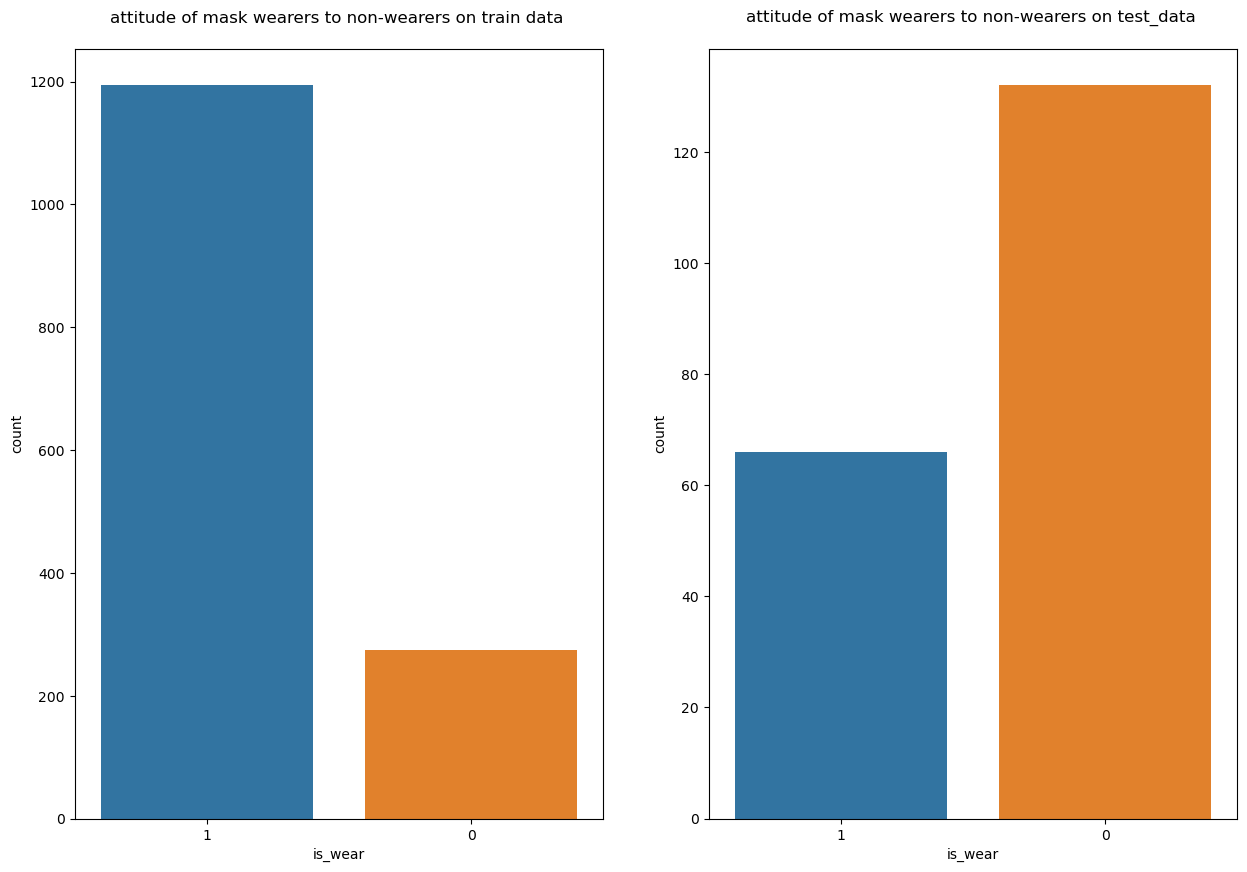

In [4]:
#Here I compare the number of pics with and without masks in train and test dataset
plt.figure(figsize = (15, 10))

plt.subplot(1, 2, 1)
plt.title('attitude of mask wearers to non-wearers on train data \n')
sns.countplot(x = train_wear_mask['is_wear'])

plt.subplot(1, 2, 2)
plt.title('attitude of mask wearers to non-wearers on test_data \n')

sns.countplot(x = test_wear_mask['is_wear'])

# distribute photos to catalogs

In [5]:
# Train data

#I want to remove dirs train and test in my output kernel if they exist
shutil.rmtree("train", ignore_errors=True)
shutil.rmtree("test", ignore_errors=True)

#Here i make them
os.mkdir('train')
os.mkdir('train/without')
os.mkdir('train/with')

train_dir = 'train'
train_with = 'train/with'
train_without = 'train/without'

#Here I just copy these pics right into the output dir form which one I will grab these pics in future. In other words I just copy - paste files from input to output
for index in range(len(train_wear_mask)):
    if train_wear_mask.is_wear.iloc[index] == '1':
        copyfile(src = train_wear_mask['dir'].iloc[index], dst = 'train/with/{}.jpg'.format(index))
    else:
        copyfile(src = train_wear_mask['dir'].iloc[index], dst = 'train/without/{}.jpg'.format(index))

In [6]:
# Test_data

# Here I do the same as with the train data
os.mkdir('test')
os.mkdir('test/without')
os.mkdir('test/with')

test_dir = 'test'
test_with = 'test/with_test'
test_without = 'test/without_test'

for index in range(len(test_wear_mask)):
    if test_wear_mask.is_wear.iloc[index] == '1':
        copyfile(src = test_wear_mask['dir'].iloc[index], dst = 'test/with/{}.jpg'.format(index))
    else:
        copyfile(src = test_wear_mask['dir'].iloc[index], dst = 'test/without/{}.jpg'.format(index))

# DataGen

In [7]:
# Here goes the most interesting part

#This is where I want to transform pictures to specific "settings", so all pictures will be in zoom range 0.2 and have the same rotation range
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    horizontal_flip  = True,
    rotation_range = 40,
    fill_mode = 'nearest'
)

# Here I just want to rescale test dataset
test_datagen = ImageDataGenerator(rescale = 1./255)

# Here I allow read the images directly from the directory and augment them. Also this method allows to devide our pics into batches 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 32,
    class_mode = 'binary',
    target_size = (256, 256)
)

test_generator = train_datagen.flow_from_directory(
    test_dir,
    batch_size = 32,
    class_mode = 'binary',
    target_size = (256, 256)
)

valid_generator = test_datagen.flow_from_directory(
    test_dir,
    batch_size = 32,
    class_mode = 'binary',
    target_size = (256, 256)
)

Found 1469 images belonging to 2 classes.
Found 198 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


# Visualization

/opt/conda/lib/python3.7/site-packages/keras/utils/image_utils.py:410: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  'grayscale is deprecated. Please use color_mode = "grayscale"'


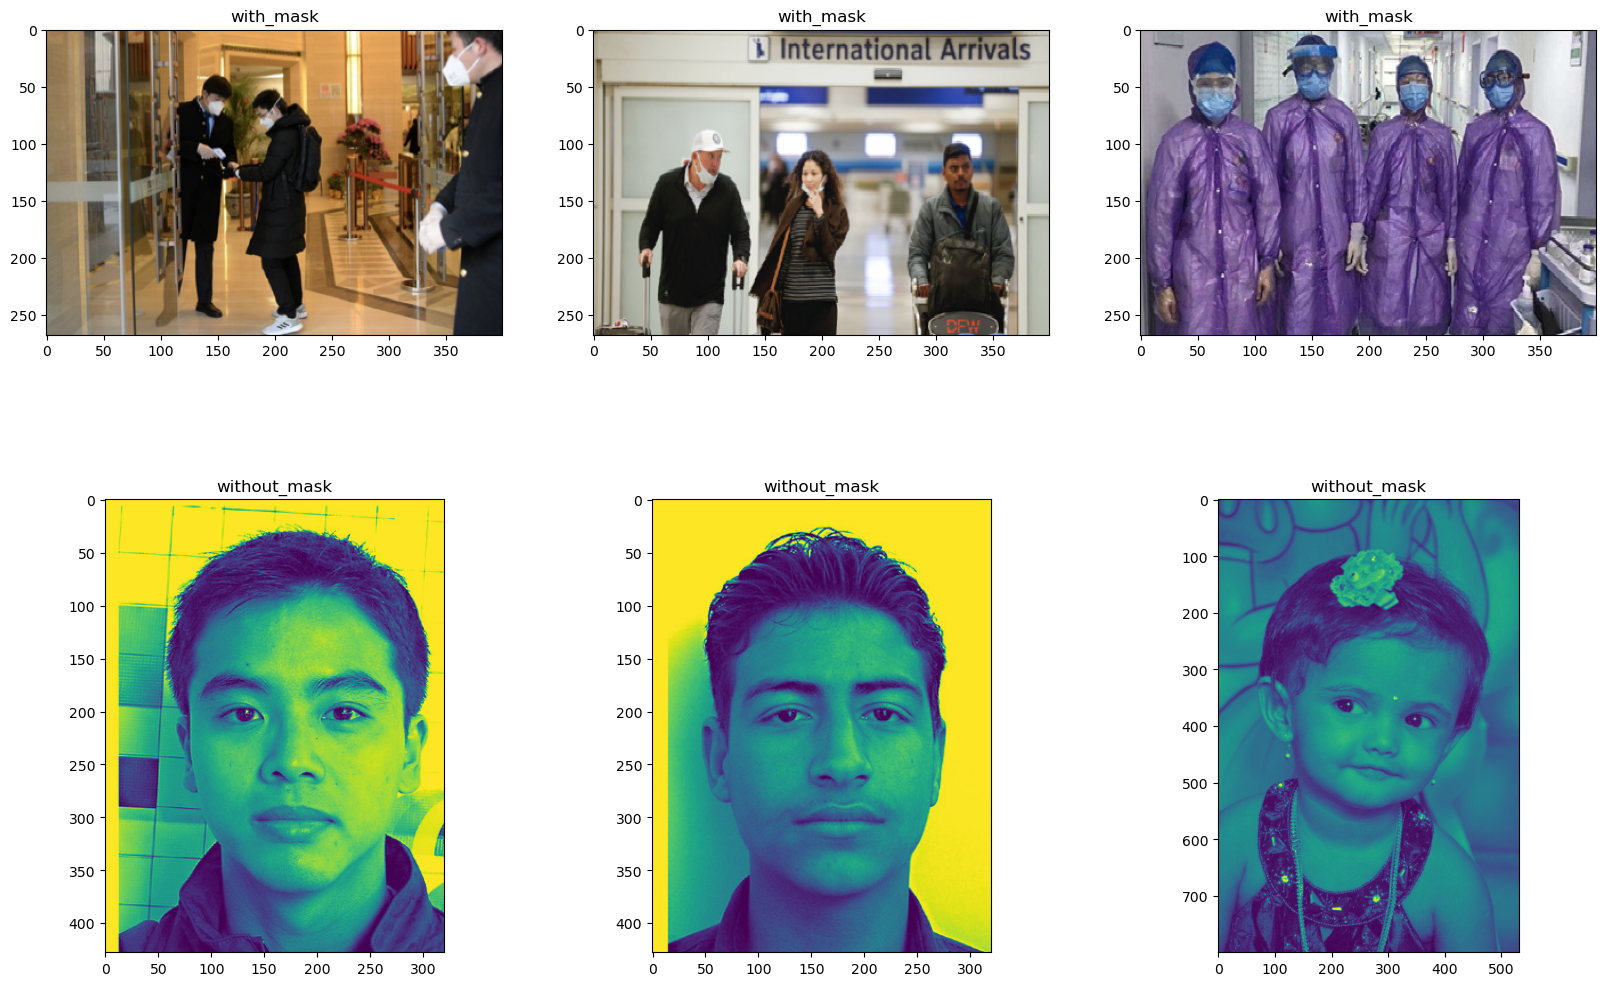

In [8]:
#No rocket science is here. Just drawing pics
plt.figure(figsize = (20 , 20))

plt.subplot(3, 3, 1)
plt.title('with_mask')
plt.imshow(tf.keras.utils.load_img(train_wear_mask.query("is_wear == '1'").dir.iloc[1], target_size = (268, 400, 3)))

plt.subplot(3, 3, 2)
plt.title('with_mask')
plt.imshow(tf.keras.utils.load_img(train_wear_mask.query("is_wear == '1'").dir.iloc[2], target_size = (268, 400, 3)))

plt.subplot(3, 3, 3)
plt.title('with_mask')
plt.imshow(tf.keras.utils.load_img(train_wear_mask.query("is_wear == '1'").dir.iloc[3], target_size = (268, 400, 3)))

plt.subplot(3, 3, 4)
plt.title('without_mask')
plt.imshow(tf.keras.utils.load_img(train_wear_mask.query("is_wear == '0'").dir.iloc[1], (428, 320, 3)))

plt.subplot(3, 3, 5)
plt.title('without_mask')
plt.imshow(tf.keras.utils.load_img(train_wear_mask.query("is_wear == '0'").dir.iloc[2], (428, 320, 3)))

plt.subplot(3, 3, 6)
plt.title('without_mask')
plt.imshow(tf.keras.utils.load_img(train_wear_mask.query("is_wear == '0'").dir.iloc[3], (428, 320, 3)))

In [9]:
# This method allows me to change learning rate while neural network is learning. So after 3 (in my case) epochs it will start to decrease learning rate
def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:
        return lr * tf.math.exp(-0.1)


callbacks = [
    EarlyStopping(monitor = 'accuracy', patience = 5), # I want to stop training earlier if i see no changes after 5 iterations in an epoch
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-2), # Here is the metric which i will check during training. If I see that val_loss doesnt change after 5 iterations, it stops earlier
    ModelCheckpoint(filepath='weights.h5', save_weights_only=True, monitor='val_accuracy',mode='max', save_best_only=True), # Here is just checkpoint which we can use after training (for example)
    LearningRateScheduler(scheduler), # here I use my learning rate changer (which is written above in the method)
    
]

In [10]:
#Here goes one interesting thing. We use already taught model and we don't want to train it because... Surprise it is already trained by cool it guys with big ass computers
VGG =  VGG16(weights = 'imagenet', include_top = False, input_shape = (256, 256, 3)) # Here we say that we want to use the same shape as in DataGen cells

VGG.trainable = False # Here I put parameter that I dont want to train it

58889256/58889256 [==============================] - 2s 0us/step


In [11]:
#Here I add layers and it is better to Google what each of them is using
model = Sequential()
model.add(VGG)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy']) # The main point in this place is to use binary_crossentropy loss, because we have binary classification task (Got mask or not)
                                                                    # We use accuracy, because we initialized it earlier in earlystopping

model.summary() # This one is optional, but you can take a peek and see what shape we will have at each layer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23,120,065
Trainable params: 8,405,377
Non

In [12]:
# Here is where the whole juice comes in
history = model.fit(
    train_generator, # Remember where we "Augmented" pics ? Here is the place where we put these images, because they are in tensor format what we exactly need for out Neural network
    batch_size = 32, # Here I specify some batch size (You are free to experiment with this one)
    epochs = 50, #The same with epoch. Just try not to overfit it
    validation_data = test_generator, # Here I want to validate my data. You can use: test_generator OR valid_generator . (Better of course to use test)
    callbacks = callbacks # Here I use settings with early stopping and learning rate which we used earlier
         )

Epoch 1/50
46/46 [==============================] - 436s 9s/step - loss: 1.0567 - accuracy: 0.8380 - val_loss: 0.8855 - val_accuracy: 0.6616 - lr: 0.0010
Epoch 2/50
46/46 [==============================] - 448s 10s/step - loss: 0.2570 - accuracy: 0.9108 - val_loss: 0.8232 - val_accuracy: 0.7475 - lr: 0.0010
Epoch 3/50
46/46 [==============================] - 430s 9s/step - loss: 0.1261 - accuracy: 0.9632 - val_loss: 0.2084 - val_accuracy: 0.9091 - lr: 0.0010
Epoch 4/50
46/46 [==============================] - 425s 9s/step - loss: 0.1189 - accuracy: 0.9571 - val_loss: 0.2798 - val_accuracy: 0.8990 - lr: 9.0484e-04
Epoch 5/50
46/46 [==============================] - 440s 10s/step - loss: 0.1019 - accuracy: 0.9646 - val_loss: 0.3563 - val_accuracy: 0.8990 - lr: 8.1873e-04
Epoch 6/50
46/46 [==============================] - 429s 9s/step - loss: 0.0709 - accuracy: 0.9755 - val_loss: 0.1654 - val_accuracy: 0.9394 - lr: 7.4082e-04
Epoch 7/50
46/46 [==============================] - 457s 10s/s

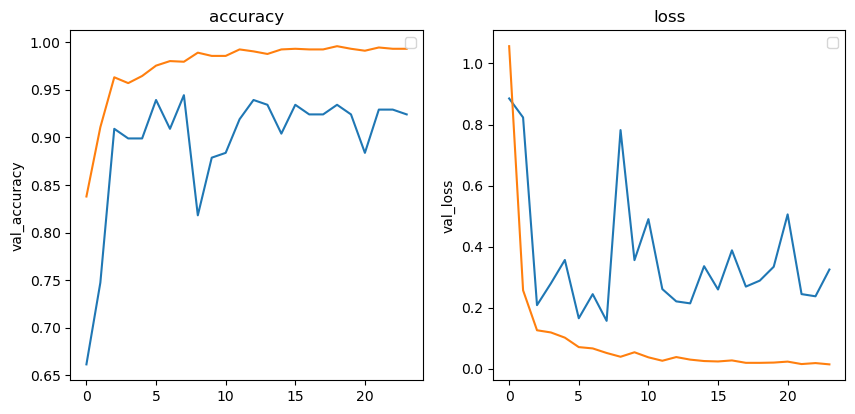

In [13]:
#Plotting accuracy and how it changed during the training

plt.figure(figsize = (10, 10))
plt.subplot(2,2, 1)
plt.title('accuracy')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'val_accuracy')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'accuracy')
plt.legend()

plt.subplot(2,2, 2)
plt.title('loss')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'val_loss')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'loss')
plt.legend()

In [14]:
#Here I WANT to train (not from the zero but to add training to already trained model)
VGG.trainable = True
set_trainable = False

# Here is where i look for a specific layer which i want to set trainable
for layer in VGG.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [15]:
# And as always - set that we have bin class task and use this metric
model.compile(loss = 'binary_crossentropy', metrics = ['accuracy'])

# Here is the same pattern as in last steps
history = model.fit(
    train_generator,
    batch_size = 32,
    epochs = 50,
    validation_data = test_generator,
    callbacks = callbacks
         )

Epoch 1/50
46/46 [==============================] - 515s 11s/step - loss: 4.1352 - accuracy: 0.7808 - val_loss: 2.1475 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 2/50
46/46 [==============================] - 508s 11s/step - loss: 0.6005 - accuracy: 0.8128 - val_loss: 0.9712 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 3/50
46/46 [==============================] - 513s 11s/step - loss: 0.4869 - accuracy: 0.8128 - val_loss: 1.2085 - val_accuracy: 0.3333 - lr: 0.0010
Epoch 4/50
46/46 [==============================] - 518s 11s/step - loss: 0.4831 - accuracy: 0.8128 - val_loss: 1.2564 - val_accuracy: 0.3333 - lr: 9.0484e-04
Epoch 5/50
46/46 [==============================] - 528s 11s/step - loss: 0.4858 - accuracy: 0.8128 - val_loss: 1.1196 - val_accuracy: 0.3333 - lr: 8.1873e-04
Epoch 6/50
46/46 [==============================] - 522s 11s/step - loss: 0.4822 - accuracy: 0.8128 - val_loss: 1.2256 - val_accuracy: 0.3333 - lr: 7.4082e-04
Epoch 7/50
46/46 [==============================] - 508s 1

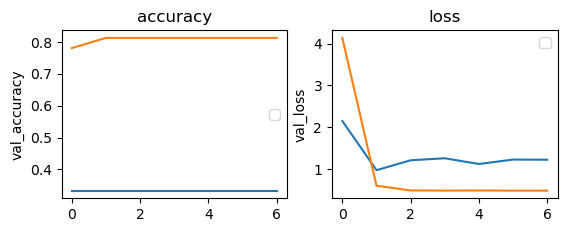

In [16]:
# Aaand here is the result of the accuracy

plt.subplot(2,2, 3)
plt.title('accuracy')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'val_accuracy')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'accuracy')
plt.legend()

plt.subplot(2,2, 4)
plt.title('loss')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'val_loss')
sns.lineplot(data = history.history, x = range(len(history.history['val_accuracy'])), y = 'loss')
plt.legend()
